# Cement Manufacturing Dataset
## by HAMZAT ABDULRAHMAN

## Table of Contents


#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

%matplotlib inline

### Data Gathering

In [2]:
concrete = pd.read_csv("concrete.csv")
concrete.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Assessing

In [3]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
concrete.duplicated().sum()

25

In [5]:
concrete.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
concrete.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [7]:
concrete.sample(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
317,233.8,0.0,94.6,197.9,4.6,947.0,852.2,14,22.14
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
207,190.0,190.0,0.0,228.0,0.0,932.0,670.0,180,46.93
737,210.7,316.1,0.0,185.7,0.0,977.0,689.3,28,37.81
357,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,3,8.06


In [8]:
0.0 in concrete['slag'].values

True

### Quality Issues:
1. There are 25 duplicate rows.
2. "0.0" values instead of null.

### Data Cleaning

In [9]:
concrete_clean = concrete.copy()

#### There are 25 duplicate rows.

#### Define: 
Remove the duplicate rows using the `drop_duplicates()` function.

#### Code:

In [10]:
concrete_clean.drop_duplicates(inplace = True, ignore_index = True)

#### Test

In [11]:
concrete_clean.duplicated().sum()

0

#### "0.0" values instead of null.

#### Define:


#### Code:

In [12]:
concrete_clean = concrete_clean.replace(0.0,np.nan)
concrete_clean.dropna(inplace = True)
concrete_clean.reset_index(drop=True, inplace = True)

#### Test:

In [13]:
0.0 in concrete_clean['slag'].values

False

In [14]:
concrete_clean.shape

(225, 9)

# Exploratory Analysis

## Univariate Exploration

#### Question:
How does the distribution of "strength" of concrete looks?

#### Visualization

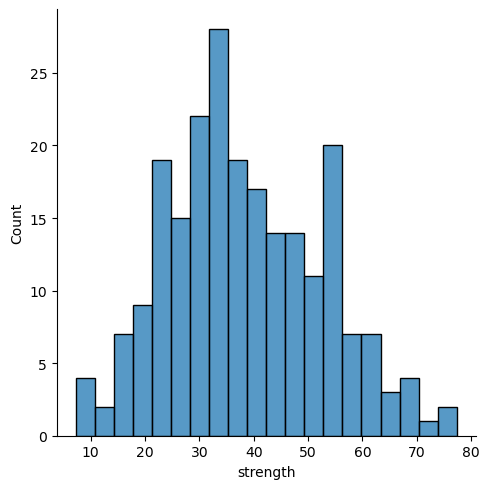

In [15]:
bin_edges = np.arange(concrete_clean['strength'].min(),concrete_clean['strength'].max() + 3.5, 3.5)
sb.displot(concrete_clean['strength'], bins = bin_edges);

#### Observation:
An approximately normal distribution having 3-4 unusual spikes of strength values less than 40Mpa

#### Question:
What is the shape of 'water' distribution plot?

#### Visualization:

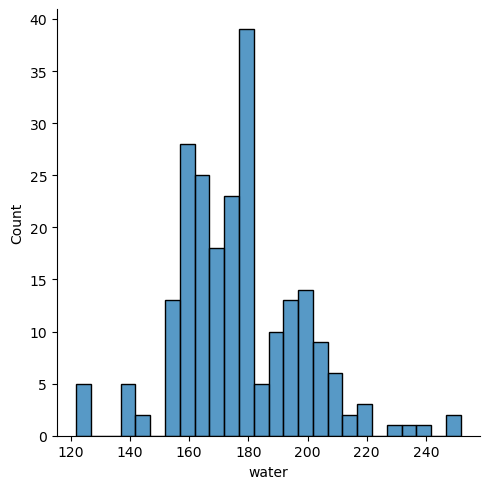

In [16]:
bin_edges = np.arange(concrete_clean['water'].min(),concrete_clean['water'].max() + 5,5)
sb.displot(concrete_clean['water'], bins = bin_edges);

#### Observation: 
Almost all the water volume in the dataset are above 150, while a very few are above 220. I observe that water volumes of about 160 - 180 have the highest frequency.

## Bivariate Exploration

#### Question:
Is strength of concrete dependent on the quantity of cement?

#### Visualization:

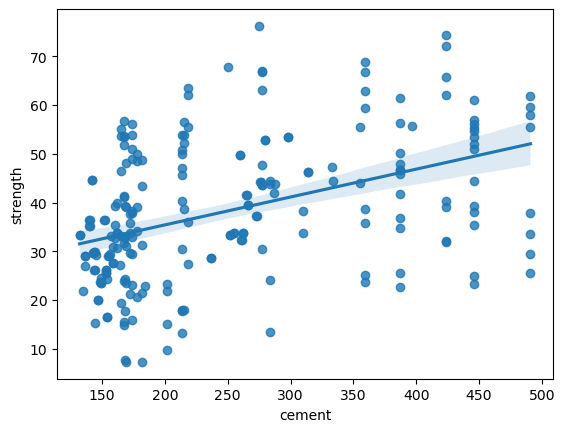

In [17]:
sb.regplot(data= concrete_clean, x='cement',y='strength');

It can be observed that for the same quantity of cement, there are different levels of strength. This implies that within a range of cement quantity used, there is/are another variable(s) upon which a strength of concrete is dependent. However, generally the higher the quantity of cement the likeliness of a greater strength.

A plot of strength against the proportion of water-to-cement (w/c) ratio should give a meaningful insight.

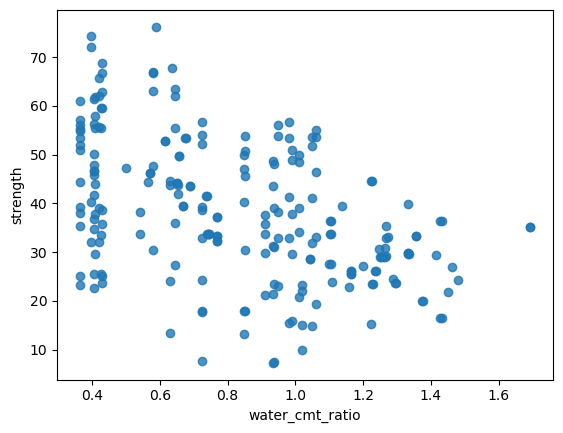

In [18]:
# create a w/c ratio column
concrete_clean['water_cmt_ratio'] = concrete_clean['water'] / concrete_clean['cement']
# create a new copy of dataframe
concrete_clean_plus = concrete_clean.copy()
# create plot of strength against the w/c ratio 
sb.regplot(data= concrete_clean_plus, x='water_cmt_ratio',y='strength', fit_reg = False);

#### Observation: 
It is observed that the lower the water-to-cement ratio, the increase in strength. Yet still as before, for an equal value of of water-to-cement ratio there are increasing levels of strength. This tells that there are other variable that come into play. 

In [19]:
print(concrete_clean_plus['water_cmt_ratio'].max(),concrete_clean_plus['water_cmt_ratio'].min())

1.6943450250536864 0.3632286995515695


In [20]:
# create a category of grades labelled (A-F) for the w/c ratio with a bin-size of 0.24
category = pd.cut(concrete_clean_plus.water_cmt_ratio, bins =[0.36,0.60,0.84,1.08,1.32,1.56,1.80], labels = ['A','B','C','D','E','F'])
# insert the new column 'water_cmt_grade' right next to the 10th column of the dataframe.
concrete_clean_plus.insert(9, 'water_cmt_grade', category)

In [21]:
concrete_clean_plus.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cmt_grade,water_cmt_ratio
0,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,C,0.937241
1,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99,D,1.251613
2,151.8,178.1,138.7,167.5,18.3,944.0,694.6,28,36.35,D,1.103426
3,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89,D,1.107784
4,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,100,49.97,C,0.849860


In [22]:
concrete_clean_plus['water_cmt_grade'].value_counts(sort=False)

A    65
B    46
C    61
D    34
E    17
F     2
Name: water_cmt_grade, dtype: int64

#### Question:
Which grade of w/c ratio in this dataset has the highest, and which has the least?

#### Visualization (univariate):

In [23]:
# convert to an ordered categorical datatype
g_class = ['A','B','C','D','E','F']
grade_class = pd.api.types.CategoricalDtype(ordered = True, categories = g_class)
concrete_clean_plus['water_cmt_grade'] = concrete_clean_plus['water_cmt_grade'].astype(grade_class);

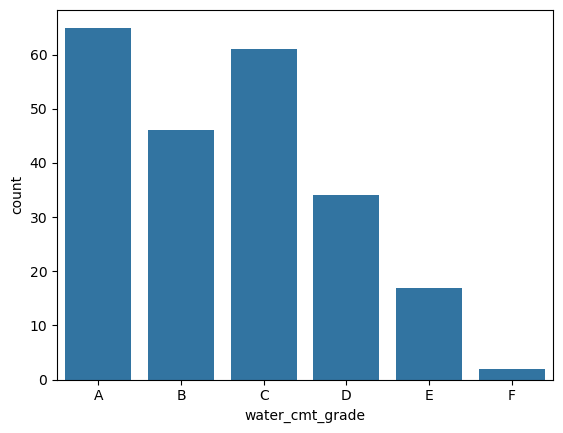

In [24]:
# plot a barchart of w/c ratio grades
base_color = sb.color_palette()[0]
sb.countplot(data=concrete_clean_plus, x='water_cmt_grade', color = base_color);

#### Observation: 
Grade A has the highest occurence while Grade F has the least occurence. Grade C has the second highest occurence, followed by Grade B,D,E in that order.

#### Question: 
What is the grade - strength relationship across all water-to-cement grade in the dataset?

In [25]:
base_color = sb.color_palette()[0]

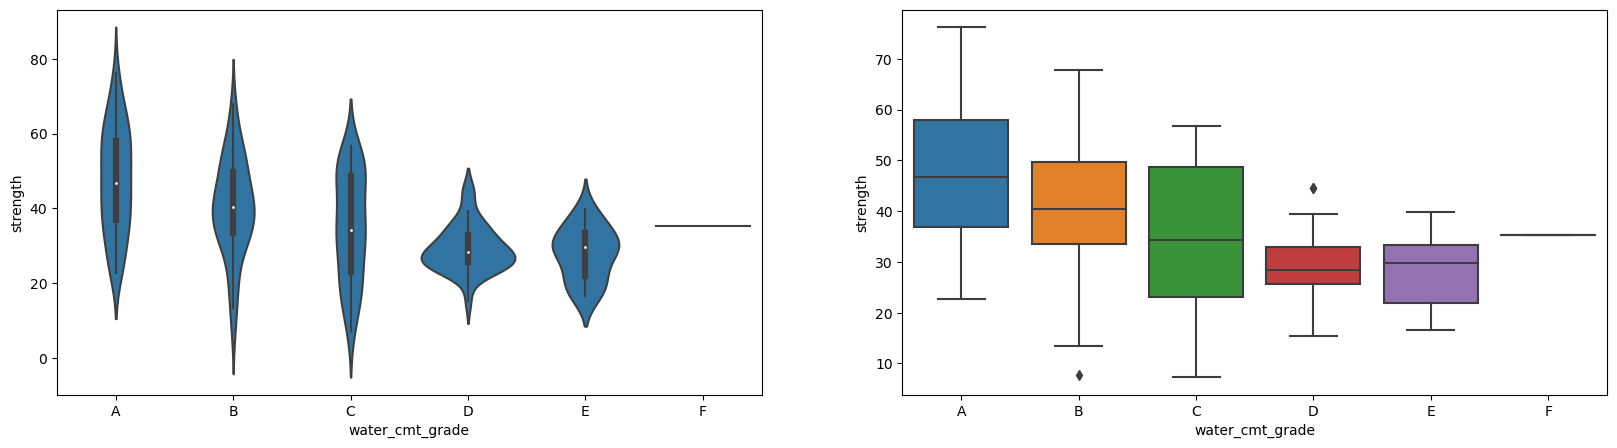

In [29]:
plt.figure(figsize = [20,5])
# Violin plot on the LHS
plt.subplot(1,2,1)
sb.violinplot(data=concrete_clean_plus, x='water_cmt_grade',y='strength', color= base_color);
# Box plot on the RHS
plt.subplot(1,2,2)
sb.boxplot(data=concrete_clean_plus, x='water_cmt_grade',y='strength');

#### Observation:
The box plot on the rigth shows that the median strength of Grade-D concrete is the lowest of all the grades, while it also reveals that there is a linear decrease in median strength with Grade-A having the highest, followed by Grade-B then Grade-C. Interestingly, Grade-E concrete samples have a slightly higher median strength than the preceding Grade-D, and it also appears to be bimodal from the violin plot.
Also, the shape (extremely skinny on each end and wide in the middle) of the distribution of Grade-D indicates that the strengths of concrete samples are highly concentrated around the median, likewise Grade-B.

Next, I'll be creating a new column to compute the fine-coarse aggregate ratio.

In [27]:
concrete_clean_plus['agg_ratio'] = concrete_clean_plus['fineagg'] / concrete_clean_plus['coarseagg']
concrete_clean_plus.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cmt_grade,water_cmt_ratio,agg_ratio
0,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,C,0.937241,0.736677
1,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99,D,1.251613,0.794318
2,151.8,178.1,138.7,167.5,18.3,944.0,694.6,28,36.35,D,1.103426,0.735805
3,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89,D,1.107784,0.708241
4,213.8,98.1,24.5,181.7,6.7,1066.0,785.5,100,49.97,C,0.849860,0.736867


#### Question:
Does the fine-to-coarse aggregate ratio determine the amount of water required for a concrete mixture?

#### Visualization:

In [42]:
concrete_clean_plus['agg_ratio'].describe()

count    225.000000
mean       0.802848
std        0.083872
min        0.654602
25%        0.736911
50%        0.776156
75%        0.851038
max        1.066748
Name: agg_ratio, dtype: float64

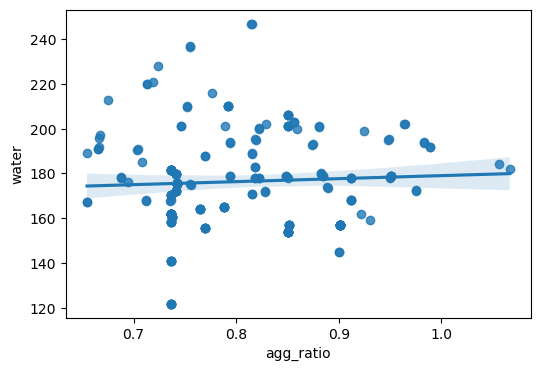

In [41]:
plt.figure(figsize = [6,4])
sb.regplot(data = concrete_clean_plus, x='agg_ratio', y='water');

#### Observation:
No obvious relationship is observed.

#### Question:
Does the aggregate ratio affects the strength of concrete?

#### Visualization:

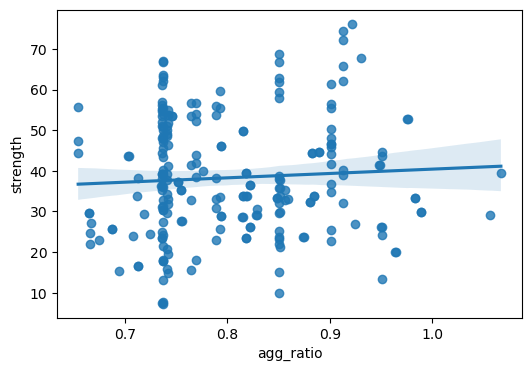

In [44]:
plt.figure(figsize = [6,4])
sb.regplot(data = concrete_clean_plus, x='agg_ratio', y='strength');

#### Observation:
No direct relationship is observed.
So far I have discovered that the water-cement grade affects the strength of concrete, the amount of water used is not directly proportional to the aggregate ratio, likewise strength is not directly proportional to the aggregate ratio.